Distance: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Img: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


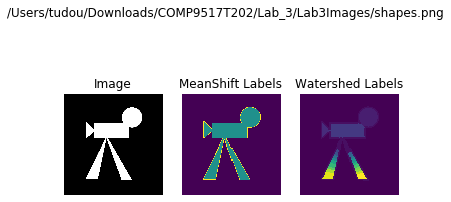

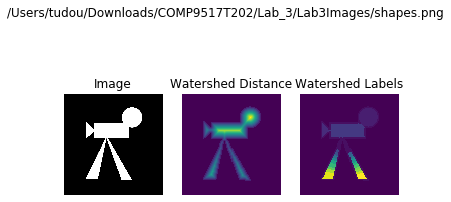

Distance: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Img: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


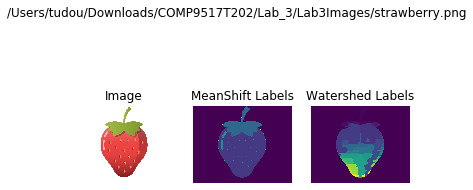

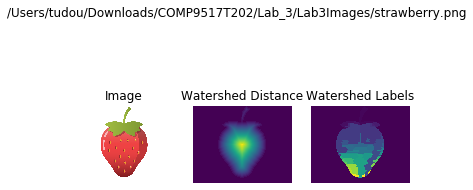

Distance: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Img: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


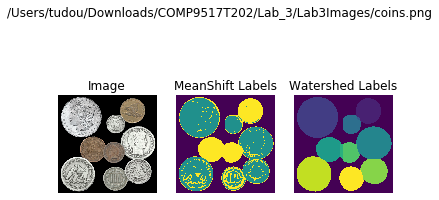

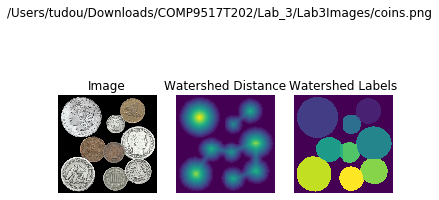

Distance: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Img: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


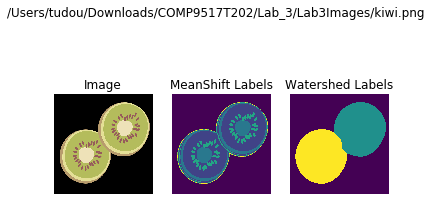

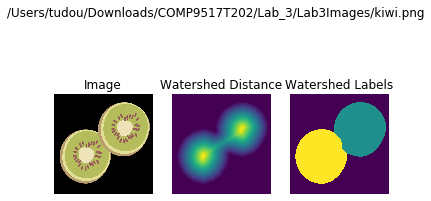

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

size = 100, 100

img_names = ["/Users/tudou/Downloads/COMP9517T202/Lab_3/Lab3Images/shapes.png", "/Users/tudou/Downloads/COMP9517T202/Lab_3/Lab3Images/strawberry.png"]
ext_names = ["/Users/tudou/Downloads/COMP9517T202/Lab_3/Lab3Images/coins.png", "/Users/tudou/Downloads/COMP9517T202/Lab_3/Lab3Images/kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


def do_meanshift(img):
    img_mat = np.array(img)[:, :, :3]

    # Extract the three colour channels
    red = img_mat[:, :, 0]
    green = img_mat[:, :, 1]
    blue = img_mat[:, :, 2]

    # Store the shape so we can reshape later
    original_shape = red.shape
    colour_samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])

    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples).reshape(original_shape)

    return ms_labels


def do_watershed(img, threshold=None):
    # Convert the image to greyscale
    img_grey = img.convert('L')

    # Convert to binary image (note: can also use cv thresholding)
    if threshold is not None:
        img_grey = img_grey.point(lambda x: 0 if x < threshold else 255, '1')

    img_array = np.array(img_grey)

    distance = ndi.distance_transform_edt(img_array)
    
    # Both implemetations of peak_local_max will work, but will produce
    # different outputs. Both are acceptable.
    local_maxi = peak_local_max(distance, indices=False,
                                footprint=np.ones((3, 3)),
                                labels=img_array)

    # local_maxi = peak_local_max(distance, indices=False)
                                
    markers = ndi.label(local_maxi)[0]
    ws_labels = watershed(-distance, markers, mask=img_array)
    print("Distance:", distance)
    print("Img:", img_array)
    return ws_labels, distance

                                
# Loop for the main lab component
for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)

    ms_labels = do_meanshift(img)
    ws_labels, distance = do_watershed(img, threshold=None)

    # Read and plot the original image
    img = mpimg.imread(img_path)

    plot_three_images(img_path, img, "Image",
                      ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    plot_three_images(img_path, img, "Image",
                      distance, "Watershed Distance",
                      ws_labels, "Watershed Labels")


# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)

    img_mat = np.array(img)

    ms_labels = do_meanshift(img)
    # Do watershed with global thresholding.
    ws_labels, distance = do_watershed(img, threshold=60)

    # Read and plot the original image
    img = mpimg.imread(img_path)

    plot_three_images(img_path, img, "Image",
                      ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    plot_three_images(img_path, img, "Image",
                      distance, "Watershed Distance",
                      ws_labels, "Watershed Labels")